
hipotesis 

la empresa obtiene mayores beneficios con los productos electrodomesticos
Los productos de hogar tienen menos costes
los productos mas caros estan activos









El estado de los productos afecta las ventas: Los productos con el estado "active" tienen un mayor número de ventas que los productos en estado "paused" o "discontinued". Es relevante identificar si los productos en estado activo se venden mejor en ciertas tiendas o categorías.

Impacto de los productos recién lanzados (launch_date): Los productos lanzados en fechas cercanas a las ventas generaron más ingresos que aquellos con fechas de lanzamiento antiguas, lo que podría indicar un efecto de novedad en las ventas.

La correlación entre el costo de los productos y el total de ingresos (total_revenue): Los productos con un mayor costo (product_cost) generan mayores ingresos totales (total_revenue), pero el análisis debería considerar si esto se traduce también en una rentabilidad sostenible.



### Librerías necesarias

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### DataFrame Final

In [15]:
# Leemos el DataFrame Final
df = pd.read_csv('..\\data\\df_final.csv')

In [16]:
# Perido de tiempo de los datos (ventas realizadas)
fecha_min = df['sale_date'].min()
fecha_max = df['sale_date'].max()

fecha_min, fecha_max

('2023-01-02', '2023-05-03')

1. Existe una relación significativa entre la ubicación de la tienda y el total de ingresos generados (total_revenue), siendo las tiendas en grandes ciudades como Madrid y Barcelona las que lideran los ingresos por ventas.

In [17]:
ingresos_por_ubicacion = df.groupby('location')['total_revenue'].sum().sort_values(ascending=False)
print(ingresos_por_ubicacion)

location
Madrid         2765.0
Bilbao         2550.0
Valencia       1635.0
Barcelona      1185.0
Itinerante      940.0
Online          650.0
Sevilla         490.0
Desconocido     180.0
Name: total_revenue, dtype: float64


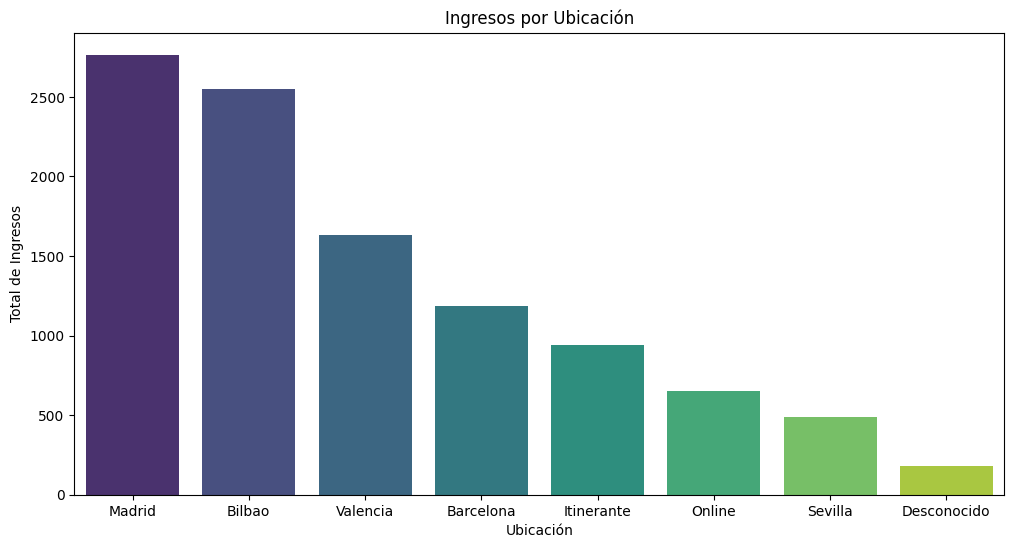

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x=ingresos_por_ubicacion.index, y=ingresos_por_ubicacion.values, palette='viridis')
plt.title('Ingresos por Ubicación')
plt.xlabel('Ubicación')
plt.ylabel('Total de Ingresos')
plt.xticks(rotation=0)
plt.show()


In [19]:
# Agrupamos por ubicación y calculamos el precio medio
precio_promedio_por_ubicacion = df.groupby('location')['product_price'].mean().reset_index()
# Ordenamos de mayor a menor por precio medio
precio_promedio_por_ubicacion = precio_promedio_por_ubicacion.sort_values(by='product_price', ascending=False)

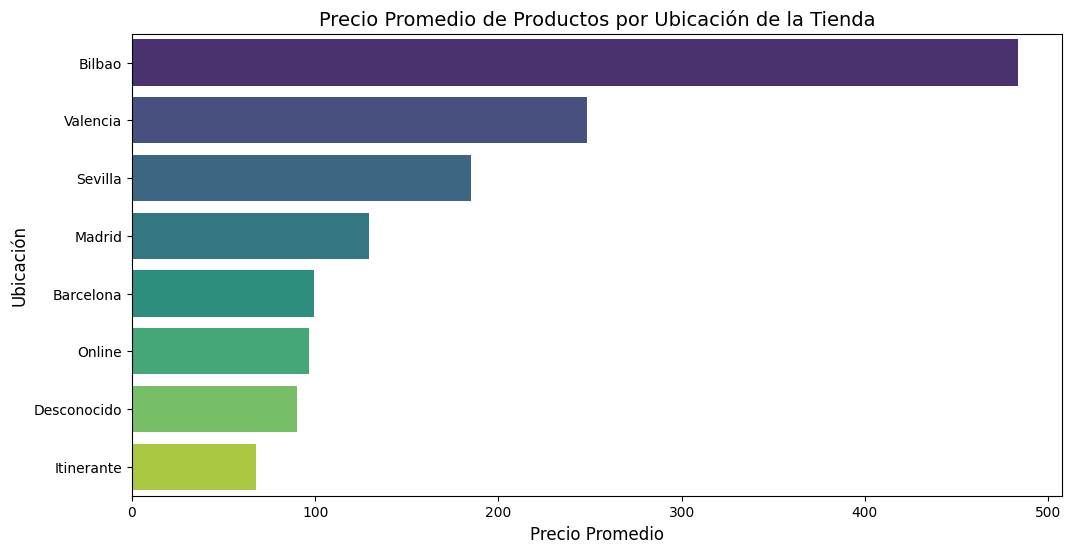

In [20]:
# Visualizamos el resultado con un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='product_price', y='location', data=precio_promedio_por_ubicacion, palette='viridis')

plt.title('Precio Promedio de Productos por Ubicación de la Tienda', fontsize=14)
plt.xlabel('Precio Promedio', fontsize=12)
plt.ylabel('Ubicación', fontsize=12)
plt.show()


In [21]:
# Agrupamos por ubicación y sumamos las unidades vendidas
unidades_por_ubicacion = df.groupby('location')['units_sold'].sum().reset_index()

# Ordenamos de mayor a menor por unidades vendidas
unidades_por_ubicacion = unidades_por_ubicacion.sort_values(by='units_sold', ascending=False)

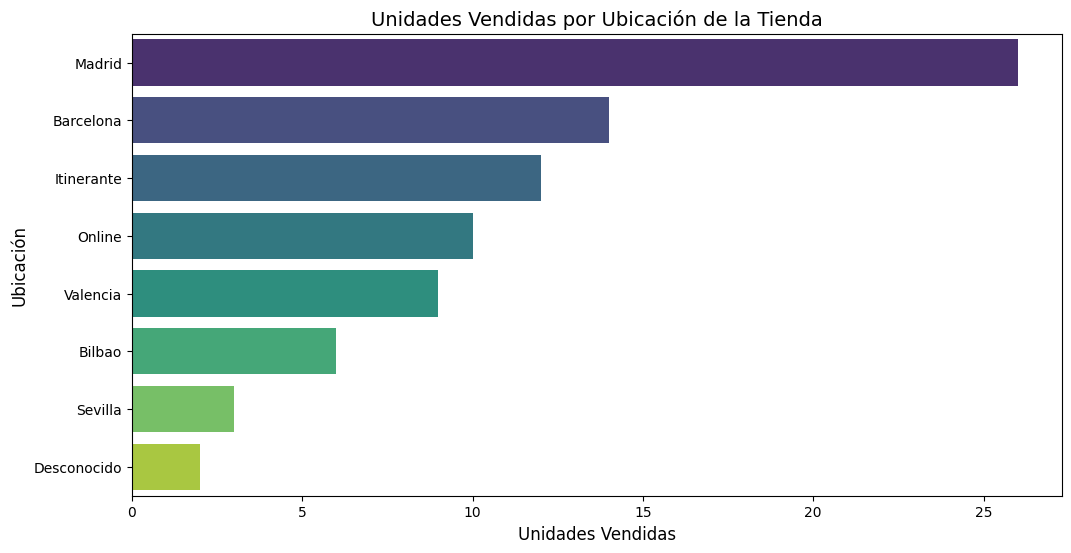

In [22]:
# Visualizamos el resultado con un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='units_sold', y='location', data=unidades_por_ubicacion, palette='viridis')

plt.title('Unidades Vendidas por Ubicación de la Tienda', fontsize=14)
plt.xlabel('Unidades Vendidas', fontsize=12)
plt.ylabel('Ubicación', fontsize=12)
plt.show()

Dados los resultados podemos conluir que las tiendas de Madrid y Barcelona no obtienes los mayores ingresos, esto se debe a que el precio medio de las tiendas como Bilbao, Valencia son elevados haciendo que aunque vendadn pocas unidades de productos puedan alcanzar ingresos elevados en sus ventas.

1. La estacionalidad impacta en las ventas

In [23]:
# Agrupar por mes y calcular ingresos totales, costes totales y beneficios totales
df['sale_date'] = pd.to_datetime(df['sale_date'])
resumen_mensual = df.groupby(df['sale_date'].dt.to_period('M')).agg(
    total_revenue=('total_revenue', 'sum'),
    total_cost=('total_cost', 'sum'),
    total_profit=('profit', 'sum')
).reset_index()

# Convertir el período de vuelta a datetime para gráficos
resumen_mensual['sale_date'] = resumen_mensual['sale_date'].dt.to_timestamp()
resumen_mensual

,sale_date,total_revenue,total_cost,total_profit
0,2023-01-01,770.0,516.0,254.0
1,2023-02-01,1340.0,980.0,360.0
2,2023-03-01,2550.0,1816.0,734.0
3,2023-04-01,4870.0,3620.0,1250.0
4,2023-05-01,865.0,605.0,260.0


In [24]:
media_revenue = resumen_mensual['total_revenue'].mean()
media_cost = resumen_mensual['total_cost'].mean()
media_profit = resumen_mensual['total_profit'].mean()

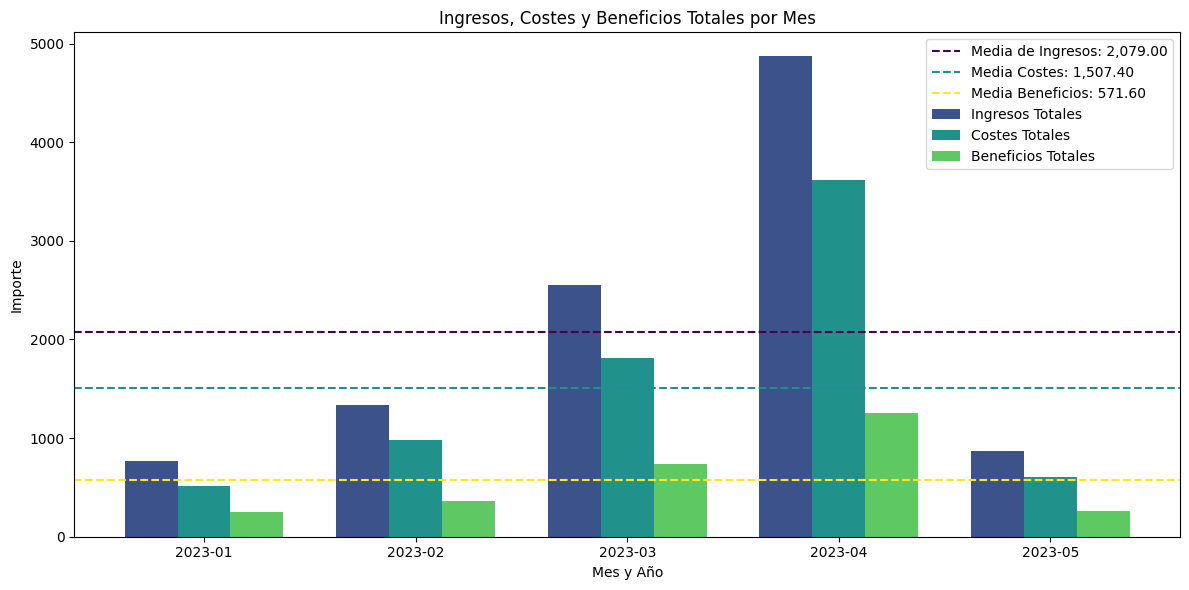

In [28]:
# Crear el gráfico de barras con la paleta 'viridis'
plt.figure(figsize=(12, 6))
bar_width = 0.25  # Ancho de las barras
x = range(len(resumen_mensual))

# Barras para ingresos, costes y beneficios con la paleta 'viridis'
viridis_palette = sns.color_palette("viridis", 3)
plt.bar(x, resumen_mensual['total_revenue'], width=bar_width, label='Ingresos Totales', color=viridis_palette[0], align='center')
plt.bar([p + bar_width for p in x], resumen_mensual['total_cost'], width=bar_width, label='Costes Totales', color=viridis_palette[1], align='center')
plt.bar([p + bar_width * 2 for p in x], resumen_mensual['total_profit'], width=bar_width, label='Beneficios Totales', color=viridis_palette[2], align='center')
plt.axhline(media_revenue, color='#440154', linestyle='--', label=f'Media de Ingresos: {media_revenue:,.2f}')
plt.axhline(media_cost, color='#21908C', linestyle='--', label=f'Media Costes: {media_cost:,.2f}')
plt.axhline(media_profit, color='#FDE725', linestyle='--', label=f'Media Beneficios: {media_profit:,.2f}')

# Etiquetas de los ejes
plt.xlabel('Mes y Año')
plt.ylabel('Importe')
plt.title('Ingresos, Costes y Beneficios Totales por Mes')
plt.xticks([p + bar_width for p in x], resumen_mensual['sale_date'].dt.strftime('%Y-%m'), rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


El beneficio es superpior en el mes de abri de 2023, justo cuando los ingresos y costes alcanzan sus máximos. Lo cual nos marca una tendencia positiva desde enero. Posteriormente, en mayo hay una caída significativa al ver su beneficio en su mínimo. 

In [36]:
# Recalcular el número de ventas mensuales por categoría
ventas_mensuales_categoria = df.groupby([df['sale_date'].dt.to_period('M'), 'category'])['sale_id'].count().reset_index()

# Renombrar columnas para mayor claridad
ventas_mensuales_categoria.columns = ['Mes', 'Categoría', 'Número de Ventas']

# Convertir el período de vuelta a datetime para facilitar gráficos
ventas_mensuales_categoria['Mes'] = ventas_mensuales_categoria['Mes'].dt.to_timestamp()
ventas_mensuales_categoria

,Mes,Categoría,Número de Ventas
0,2023-01-01,Electrodomesticos,4
1,2023-02-01,Electrodomesticos,2
2,2023-02-01,Electronica,3
3,2023-03-01,Electrodomesticos,4
4,2023-03-01,Electronica,1
5,2023-03-01,Hogar,3
6,2023-04-01,Electrodomesticos,7
7,2023-04-01,Electronica,4
8,2023-04-01,Hogar,1
9,2023-05-01,Electrodomesticos,4


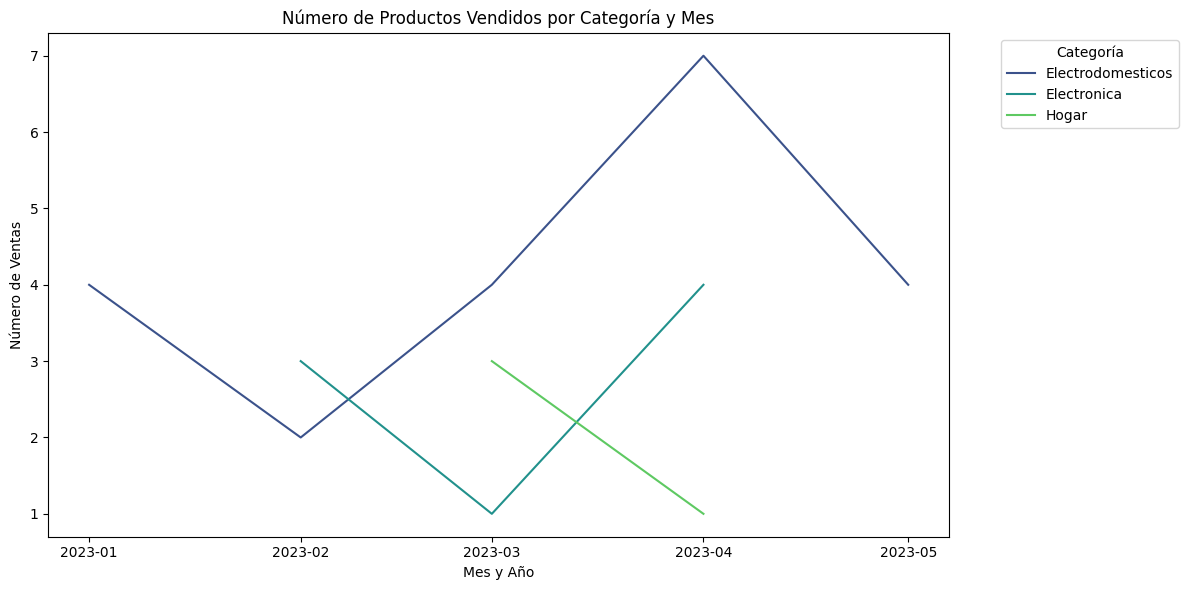

In [35]:
# Crear el gráfico de líneas actualizado con la paleta 'viridis'
plt.figure(figsize=(12, 6))

for i, categoria in enumerate(ventas_mensuales_categoria['Categoría'].unique()):
    subset = ventas_mensuales_categoria[ventas_mensuales_categoria['Categoría'] == categoria]
    plt.plot(subset['Mes'], subset['Número de Ventas'], label=categoria, color=viridis_palette[i])

# Configuración del gráfico
plt.title('Número de Productos Vendidos por Categoría y Mes')
plt.xlabel('Mes y Año')
plt.ylabel('Número de Ventas')
plt.xticks(ticks=ventas_mensuales_categoria['Mes'].drop_duplicates(),
           labels=ventas_mensuales_categoria['Mes'].drop_duplicates().dt.strftime('%Y-%m'), rotation=0)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Electrodomésticos es la categoría estrella , sus ventas marcan el ritmo de los ingresos a lo largo de los meses. Febrero cuenta con una subida en el gráfico anterior gracias a la venta de productos de electrónica. Así también, la mayor subida de beneficios se establece cuando electrodomésticos y electrónica alcanzan su pico. Esto demuestra que sus ventas son cruciales para obtener mejores resultados.
Por otro lado, hogar no tiene gran presencia, y su tendencia en los meses es poco significativa. Incluso aunque se realizase una venta de la categoría hogar, la empresa alcanzó su pico más elevado de beneficios. 


3- El precio de los productos influye en las unidades vendidas.

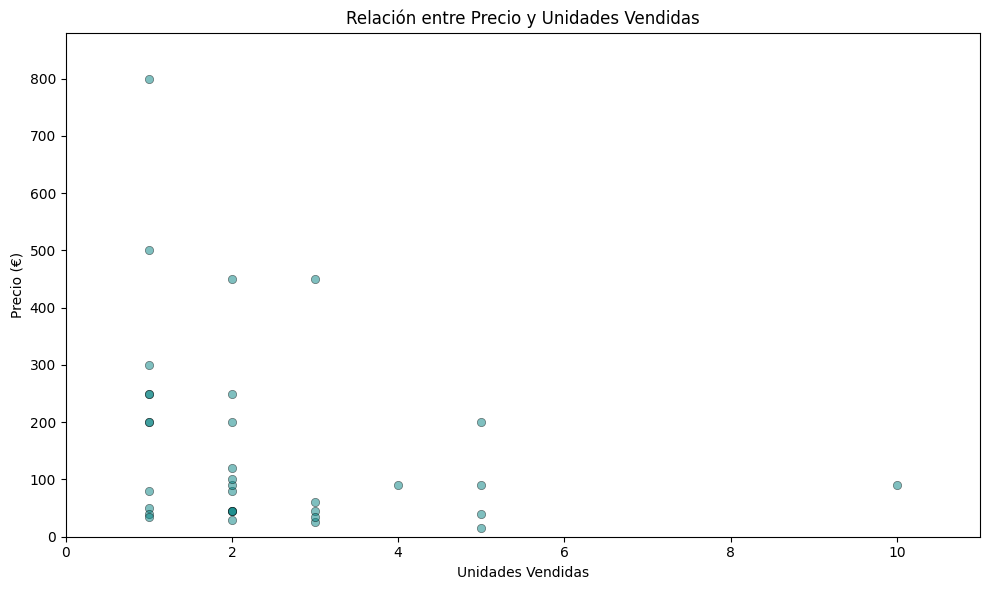

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(df['units_sold'], df['product_price'], alpha=0.5, c='teal', edgecolor='k', linewidth=0.5)
plt.title('Relación entre Precio y Unidades Vendidas')
plt.xlabel('Unidades Vendidas')
plt.ylim(0, df['product_price'].max() * 1.1)
plt.ylabel('Precio (€)')
plt.xlim(0, df['units_sold'].max() * 1.1)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

- A medida que el precio de los productos aumenta, el número de productos vendidos disminuye. De esta manera, los productos de precio más bajo tienen mayor número de ventas. 
- Así también, es preciso destacar que hay productos con precios elevados, pero con un volumen de ventas menor. Esto puede deberse a que ciertos consumidores están dispuestos comprar dichos productos o se atrevieron al haber una oberta, promoció, etc.
- Hay gran dispersión en los datos, lo que indica que dentro de un mismo rango de precios puede haber una gran diferencia en las unidades vendidas. Como aportación y análisis, esto podría depender de factores como promociones, campañas, calidad del producto o marca.

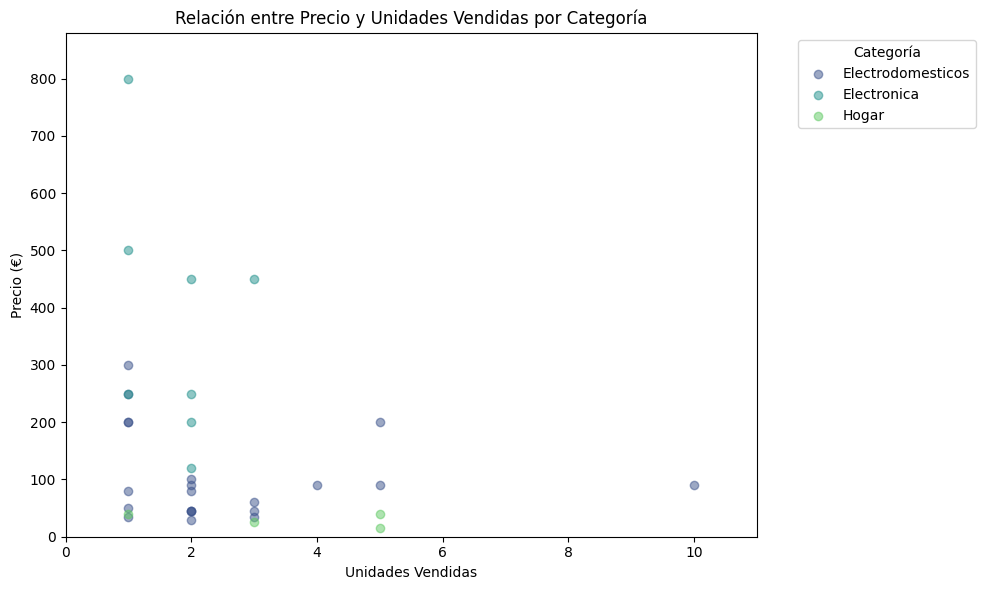

In [109]:
# Crear el gráfico de dispersión por categoría
plt.figure(figsize=(10, 6))
categories = df['category'].unique()
viridis_palette = sns.color_palette("viridis", len(categories))  # Definir la paleta

for i, category in enumerate(categories):
    subset = df[df['category'] == category]
    plt.scatter(subset['units_sold'], subset['product_price'], alpha=0.5, label=category, color=viridis_palette[i])

# Configuración del gráfico
plt.title('Relación entre Precio y Unidades Vendidas por Categoría')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Precio (€)')
plt.xlim(0, df['units_sold'].max() * 1.1)
plt.ylim(0, df['product_price'].max() * 1.1)
plt.xticks(fontsize=10, rotation=0)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


- Los productos de la categoría, pese a tener los precios de ventas bajos, cuenta con un volumen de ventas muy bajo.
- Los productos de la categoría electrodomésticos stán distribuidos en un rango intermedio de precios con una mayor dispersión en unidades vendidas. Se podría entender que tengan mayor variedad de productos.
- Los productos de la categoría electrónica están en rangos de precio más altos y con menos unidades vendidas. Confirma que sus precios elevados generan un menor consumo y volumen de ventas.

Relación entre beneficios, ingresos , costes y categorías.

In [103]:
rel_bic_categorias = df.groupby('category').agg(
    total_revenue=('total_revenue', 'sum'),
    total_cost=('total_cost', 'sum'),
    total_profit=('profit', 'sum')
).reset_index()
rel_bic_categorias

,category,total_revenue,total_cost,total_profit
0,Electrodomesticos,5065.0,3508.0,1557.0
1,Electronica,4940.0,3760.0,1180.0
2,Hogar,390.0,269.0,121.0


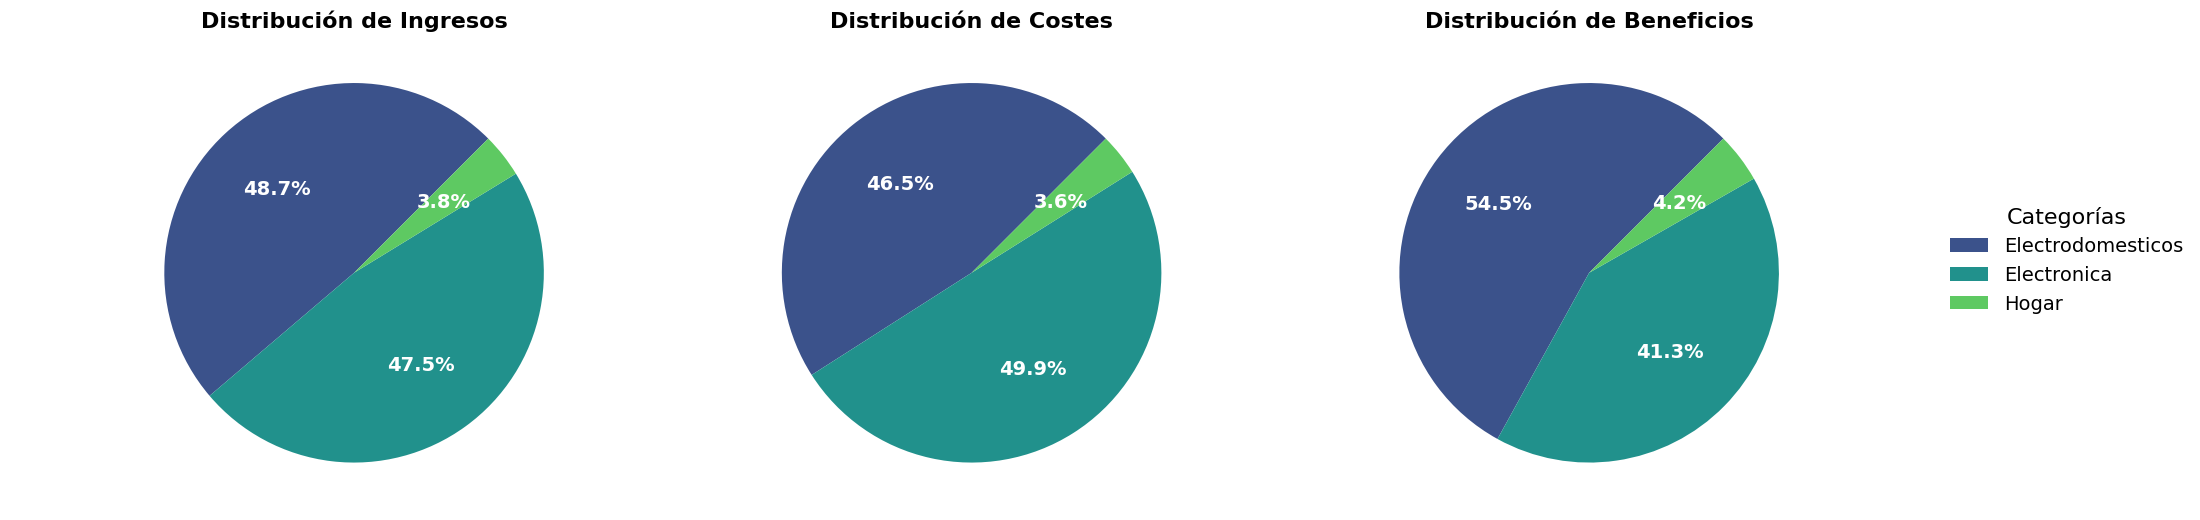

In [101]:
# Crear una figura con subgráficos para los tres gráficos de pastel
fig, axes = plt.subplots(1, 3, figsize=(22, 8))

# Gráfico de pastel para ingresos totales
axes[0].pie(
    rel_bic_categorias['total_revenue'],
    labels=rel_bic_categorias['category'],
    textprops={'color': 'white', 'fontsize': 14, 'weight': 'bold'},
    autopct='%1.1f%%',
    startangle=45,
    colors=sns.color_palette("viridis", len(rel_bic_categorias['category']))
)
axes[0].set_title('Distribución de Ingresos', fontsize=16, fontweight='bold')

# Gráfico de pastel para costes totales
axes[1].pie(
    rel_bic_categorias['total_cost'],
    labels=rel_bic_categorias['category'],
    textprops={'color': 'white', 'fontsize': 14, 'weight': 'bold'},
    autopct='%1.1f%%',
    startangle=45,
    colors=sns.color_palette("viridis", len(rel_bic_categorias['category']))
)
axes[1].set_title('Distribución de Costes', fontsize=16, fontweight='bold')

# Gráfico de pastel para beneficios totales
axes[2].pie(
    rel_bic_categorias['total_profit'],
    labels=rel_bic_categorias['category'],
    textprops={'color': 'white', 'fontsize': 14, 'weight': 'bold'},
    autopct='%1.1f%%',
    startangle=45,
    colors=sns.color_palette("viridis", len(rel_bic_categorias['category']))
)
axes[2].set_title('Distribución de Beneficios', fontsize=16, fontweight='bold')

# Leyenda común para los tres gráficos
fig.legend(
    labels=rel_bic_categorias['category'],
    loc='center right',
    fontsize=14,
    title='Categorías',
    title_fontsize=16,
    frameon=False,
    markerscale=1.5
)

# Ajustar la disposición
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


- La categoría hogar tiene poca presencia en las tres distribuciones, indicando que sus ventas son escasas y generan poca utilidad para la empresa. 
- Los electrodomésticos generan mayores beneficios, ya que, como hemos podido comprobar, tienen un mayor número de ventas. Es por eso que dominan tanto los ingresos como los costes.
- La electrónica tiene una contribución notable en ingresos. Sin embargo, al observar los gráficos anteriores, entendemos que esta categoría vende pocas unidades, lo cual provoca que tenga márgenes de beneficios más ajustados, en línea con sus precios elevados.
-Como posible estrategia a considerar, se podría optimizar los márgenes en la categoría de electrónica con el fin de incentivar las ventas, manteniendo una mejor relación precio-venta